In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing,metrics,linear_model

In [2]:
bike_share = pd.read_csv('C:/Users/ANANDHI SUNDAR/Downloads/day.csv')
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_share.shape

(730, 16)

In [4]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike_share['dteday'] = pd.to_datetime(bike_share.dteday)
bike_share['season'] = bike_share.season.astype('category')
bike_share['yr'] = bike_share.yr.astype('category')
bike_share['mnth'] = bike_share.mnth.astype('category')
bike_share['holiday'] = bike_share.holiday.astype('category')
bike_share['weekday'] = bike_share.weekday.astype('category')
bike_share['workingday'] = bike_share.workingday.astype('category')
bike_share['weathersit'] = bike_share.weathersit.astype('category')
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    category      
 3   yr          730 non-null    category      
 4   mnth        730 non-null    category      
 5   holiday     730 non-null    category      
 6   weekday     730 non-null    category      
 7   workingday  730 non-null    category      
 8   weathersit  730 non-null    category      
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: category(7), datetime64

In [6]:
bike_share.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,2018-06-01,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,2018-07-01,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,2018-08-01,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,2018-09-01,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,2018-10-01,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [7]:
bike_share.describe()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    category      
 3   yr          730 non-null    category      
 4   mnth        730 non-null    category      
 5   holiday     730 non-null    category      
 6   weekday     730 non-null    category      
 7   workingday  730 non-null    category      
 8   weathersit  730 non-null    category      
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: category(7), datetime64

In [9]:
bike_share['dteday'] = pd.to_datetime(bike_share.dteday)

In [10]:
bike_share.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
bike_share["season"].unique()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

In [12]:
season = {1: 'spring', 
          2:'summer', 
          3:'fall', 
          4:'winter'}

bike_share["season"]= bike_share["season"].map(season)


In [13]:
bike_share.season.unique()

['spring', 'summer', 'fall', 'winter']
Categories (4, object): ['spring', 'summer', 'fall', 'winter']

In [14]:
year = {0:2018,1:2019}
bike_share["yr"] = bike_share["yr"].map(year)


In [15]:
bike_share.yr.unique()

[2018, 2019]
Categories (2, int64): [2018, 2019]

In [16]:
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,2018,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,2018,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,2018,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [17]:
bike_share.mnth.unique()

[1, 2, 3, 4, 5, ..., 8, 9, 10, 11, 12]
Length: 12
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]

In [18]:
month = {1 : "Jan" , 2 : "Feb", 3 : "Mar" , 4 : " Apr" , 5 : "May" , 6 : "Jun",
         7 : "Jul", 8 : "Aug" , 9 : "Sep" , 10 : "Oct" , 11 : "Nov" , 12 : "Dec"}

In [19]:
bike_share["mnth"] = bike_share["mnth"].map(month)

In [20]:
bike_share["mnth"]

0      Jan
1      Jan
2      Jan
3      Jan
4      Jan
      ... 
725    Dec
726    Dec
727    Dec
728    Dec
729    Dec
Name: mnth, Length: 730, dtype: category
Categories (12, object): ['Jan', 'Feb', 'Mar', ' Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']

In [21]:
day = {0 : "Sun" , 1 : "Mon" , 2 : "Tue" , 3 : "Wed" ,
      4 : "Thu" , 5 : "Fri", 6 : "Sat"}

In [22]:
bike_share["weekday"] = bike_share["weekday"].map(day)
bike_share["weekday"]

0      Sat
1      Sun
2      Mon
3      Tue
4      Wed
      ... 
725    Thu
726    Fri
727    Sat
728    Sun
729    Mon
Name: weekday, Length: 730, dtype: category
Categories (7, object): ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

In [23]:
bike_share["weathersit"].unique()

[2, 1, 3]
Categories (3, int64): [1, 2, 3]

In [24]:
weather = {1 : "Clear",
          2 : "Cloudy",
          3 : "Light Rain"}

In [25]:
bike_share["weathersit"] = bike_share["weathersit"].map(weather)

In [26]:
bike_share["weathersit"]

0      Cloudy
1      Cloudy
2       Clear
3       Clear
4       Clear
        ...  
725    Cloudy
726    Cloudy
727    Cloudy
728     Clear
729    Cloudy
Name: weathersit, Length: 730, dtype: category
Categories (3, object): ['Clear', 'Cloudy', 'Light Rain']

In [27]:
bike_share.isnull().sum()*100/bike_share.shape[0]

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [28]:
bike_share["windspeed"] = round (bike_share["windspeed"],0)
bike_share["temp"] = round (bike_share["temp"],0)


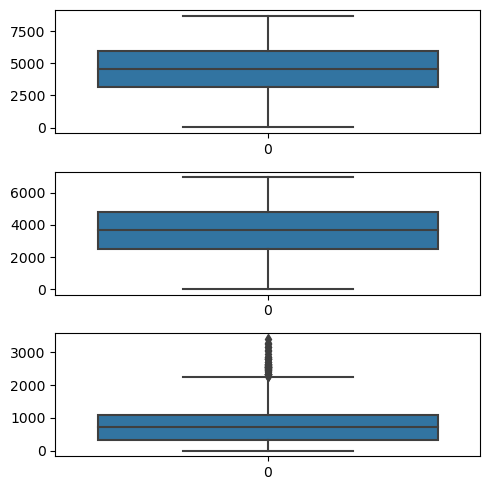

In [29]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(bike_share['cnt'], ax = axs[0])
plt2 = sns.boxplot(bike_share['registered'], ax = axs[1])
plt3 = sns.boxplot(bike_share['casual'], ax = axs[2])
plt.tight_layout()

In [30]:
yr_sum = bike_share.groupby("yr")["cnt"].sum()
yr_sum = yr_sum.reset_index()

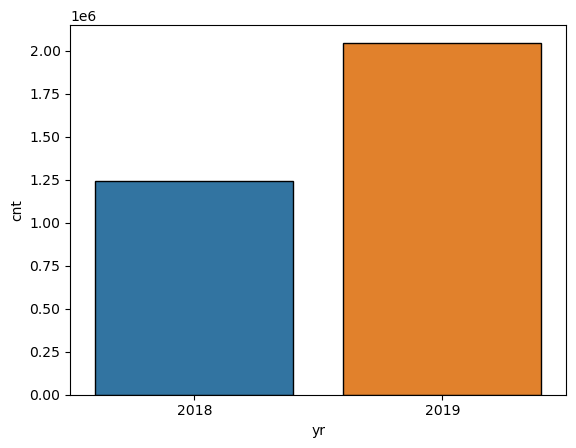

In [31]:
sns.barplot(data = yr_sum, x = "yr" , y = "cnt", edgecolor = "black");

In [32]:
mnth_sum = bike_share.groupby("mnth")["cnt"].sum()
mnth_sum = mnth_sum.reset_index()

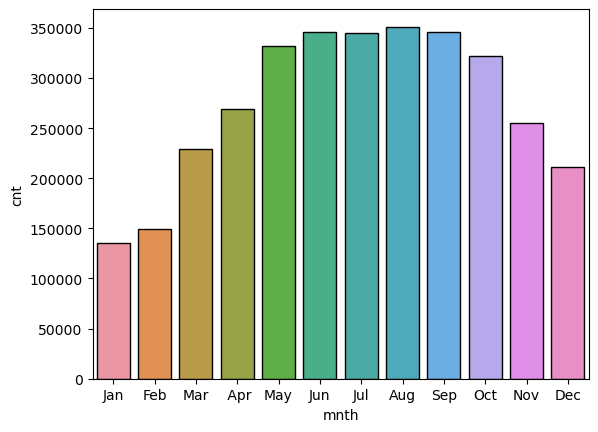

In [33]:
sns.barplot(data = mnth_sum, x = "mnth" , y = "cnt", edgecolor = "black");

In [34]:
weekday_sum = bike_share.groupby("weekday")["cnt"].sum()
weekday_sum = weekday_sum.reset_index()

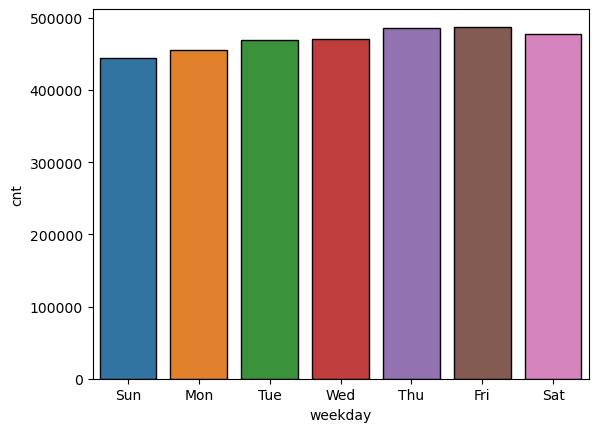

In [35]:
sns.barplot(data = weekday_sum, x = "weekday" , y = "cnt", edgecolor = "black");

In [36]:
workday_sum = bike_share.groupby("workingday")["cnt"].sum()
workday_sum = workday_sum.reset_index()

<Axes: xlabel='workingday', ylabel='cnt'>

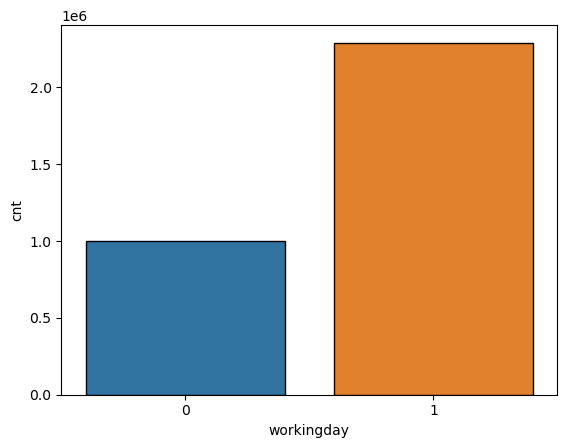

In [37]:
sns.barplot(data=workday_sum,x = "workingday", y ="cnt",edgecolor = "black")

In [38]:
weather_sum = bike_share.groupby("weathersit")["cnt"].sum()
weather_sum = weather_sum.reset_index()

<Axes: xlabel='weathersit', ylabel='cnt'>

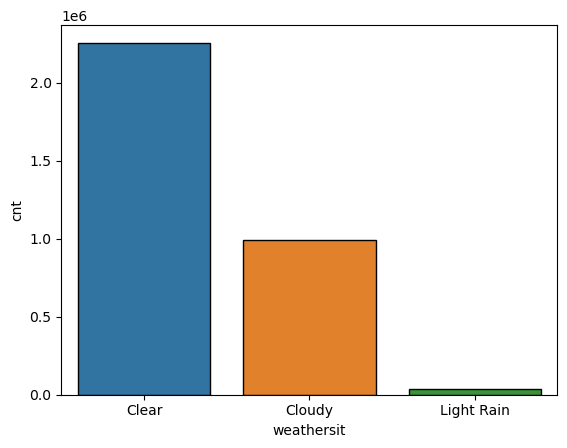

In [39]:
sns.barplot(data = weather_sum , x = "weathersit", y ="cnt" , edgecolor = "black")

<Axes: xlabel='windspeed', ylabel='cnt'>

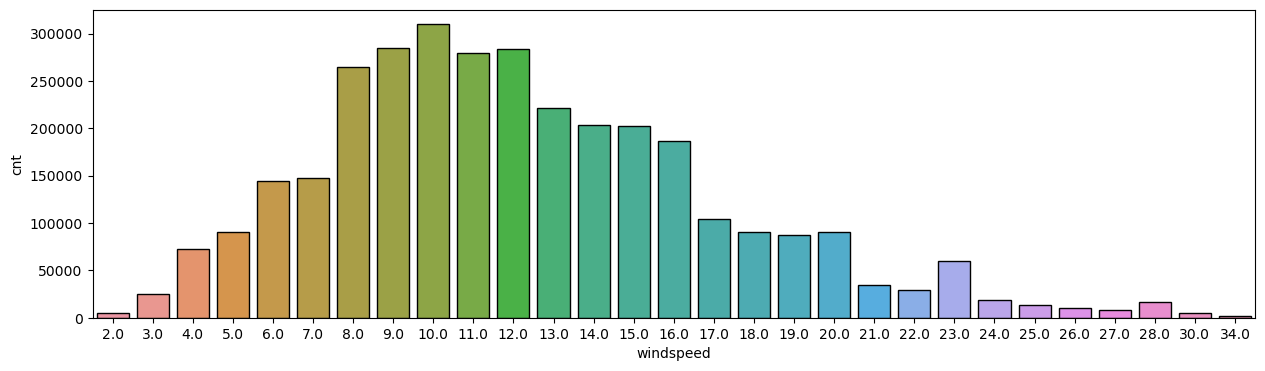

In [40]:
windspeed_sum = bike_share.groupby("windspeed")["cnt"].sum()
windspeed_sum = windspeed_sum.reset_index()
plt.figure(figsize = (15,4) , dpi = 100)
sns.barplot(data = windspeed_sum,x = "windspeed",y ="cnt",edgecolor ="black")

<Axes: xlabel='temp', ylabel='cnt'>

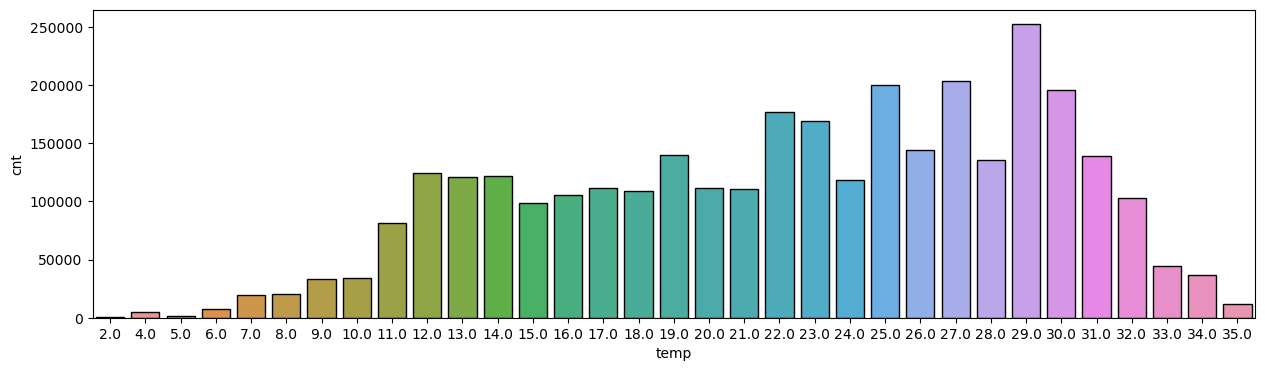

In [41]:
temp_sum = bike_share.groupby("temp")["cnt"].sum()
temp_sum = temp_sum.reset_index()
plt.figure(figsize = (15,4) , dpi = 100)
sns.barplot(data = temp_sum,x = "temp",y ="cnt",edgecolor ="black")

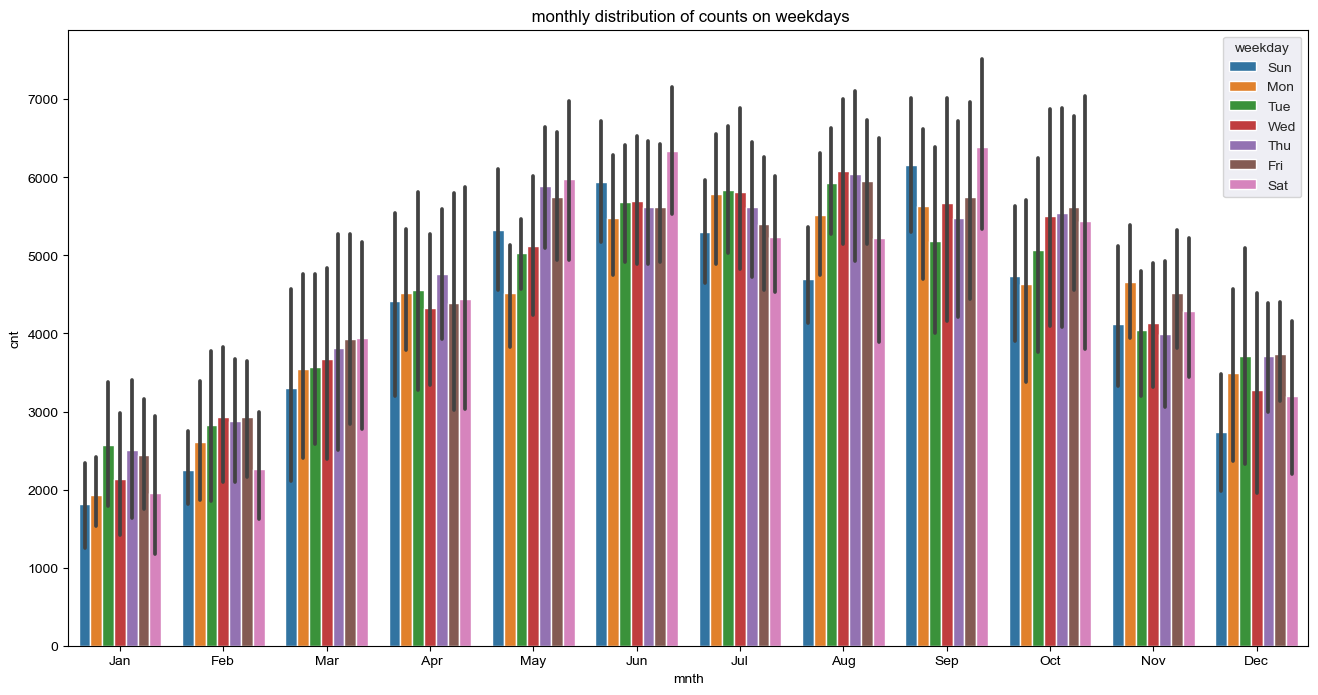

In [42]:
fig,ax = plt.subplots(figsize=(16,8))
sns.set_style('dark') 

# Barplot for seasonwise monthly distribution of counts weekdays

##sns.barplot(x='mnth',y = 'cnt',data=bike_share[['mnth','cnt','season']],ax=ax, hue='season')
sns.barplot(x='mnth',y = 'cnt',data=bike_share[['mnth','cnt','weekday']],ax=ax, hue='weekday')
ax.set_title(' monthly distribution of counts on weekdays')
plt.show()

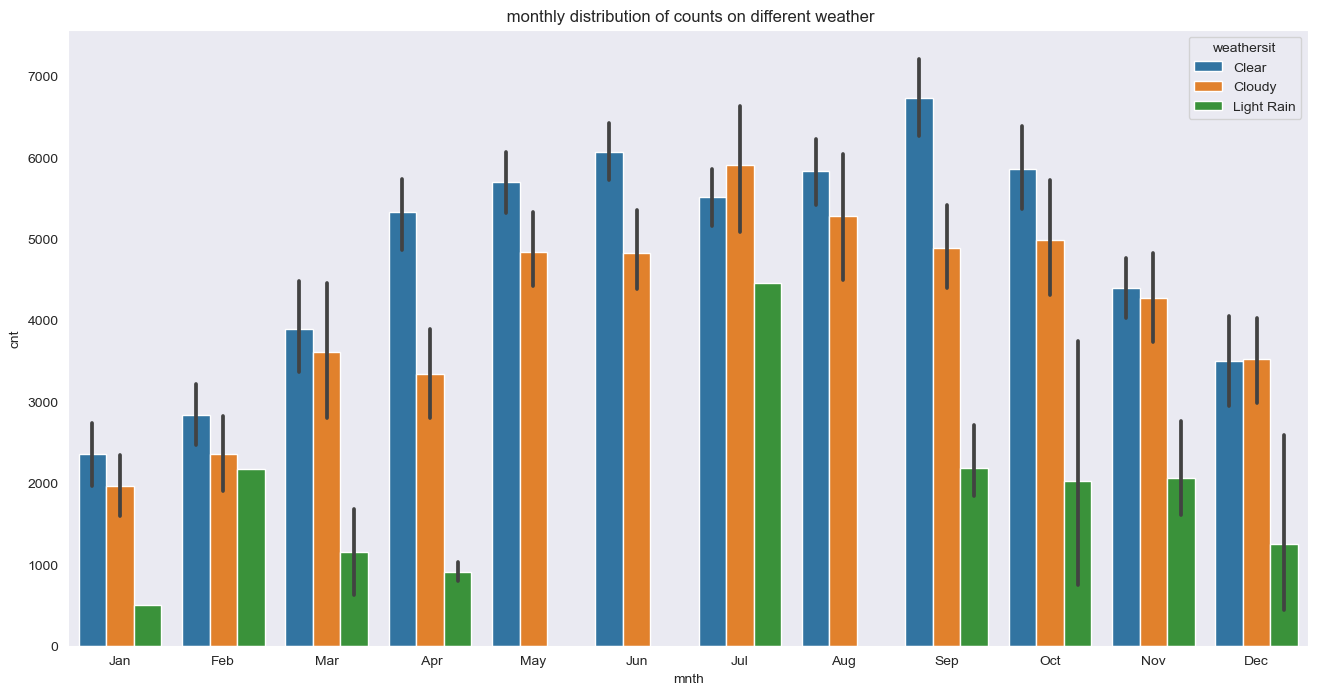

In [43]:
fig,ax = plt.subplots(figsize=(16,8))
sns.set_style('dark') 

# Barplot for seasonwise monthly distribution of counts weather

##sns.barplot(x='mnth',y = 'cnt',data=bike_share[['mnth','cnt','season']],ax=ax, hue='season')
sns.barplot(x='mnth',y = 'cnt',data=bike_share[['mnth','cnt','weathersit']],ax=ax, hue='weathersit')
ax.set_title(' monthly distribution of counts on different weather')
plt.show()

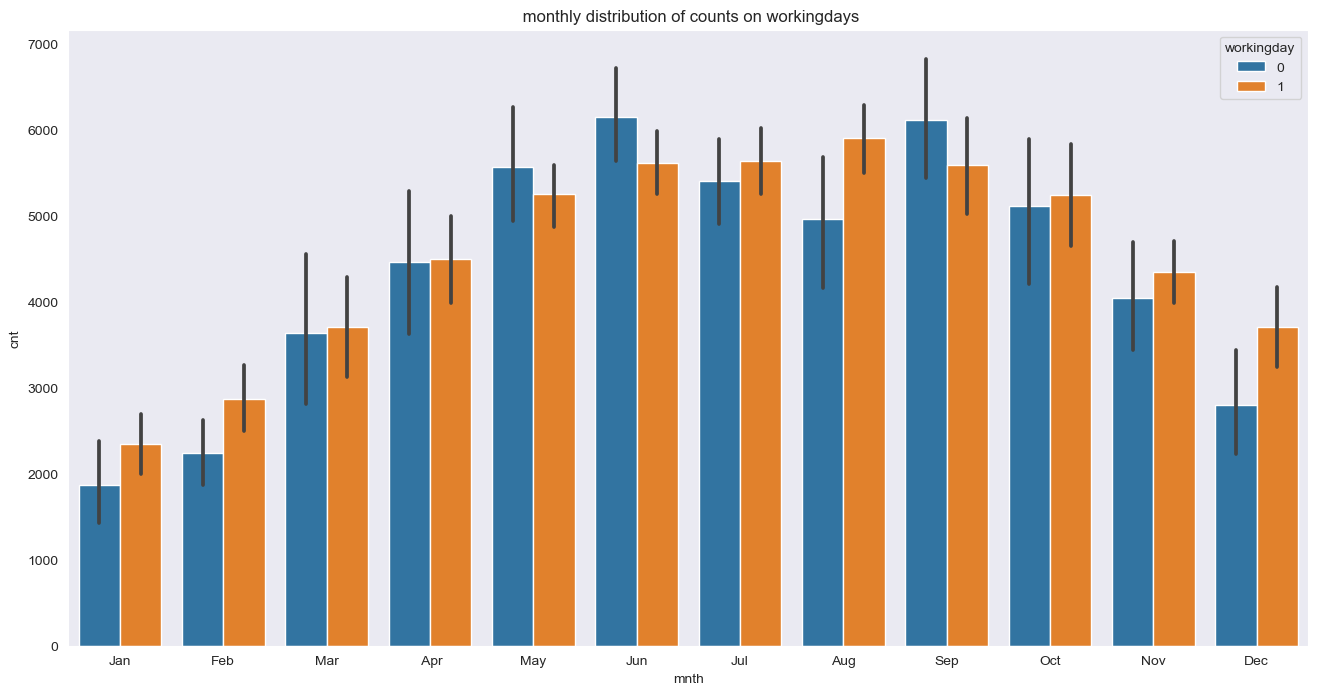

In [44]:
fig,ax = plt.subplots(figsize=(16,8))
sns.set_style('dark') 

# Barplot for seasonwise monthly distribution of counts workingdays

##sns.barplot(x='mnth',y = 'cnt',data=bike_share[['mnth','cnt','season']],ax=ax, hue='season')
sns.barplot(x='mnth',y = 'cnt',data=bike_share[['mnth','cnt','workingday']],ax=ax, hue='workingday')
ax.set_title(' monthly distribution of counts on workingdays')
plt.show()

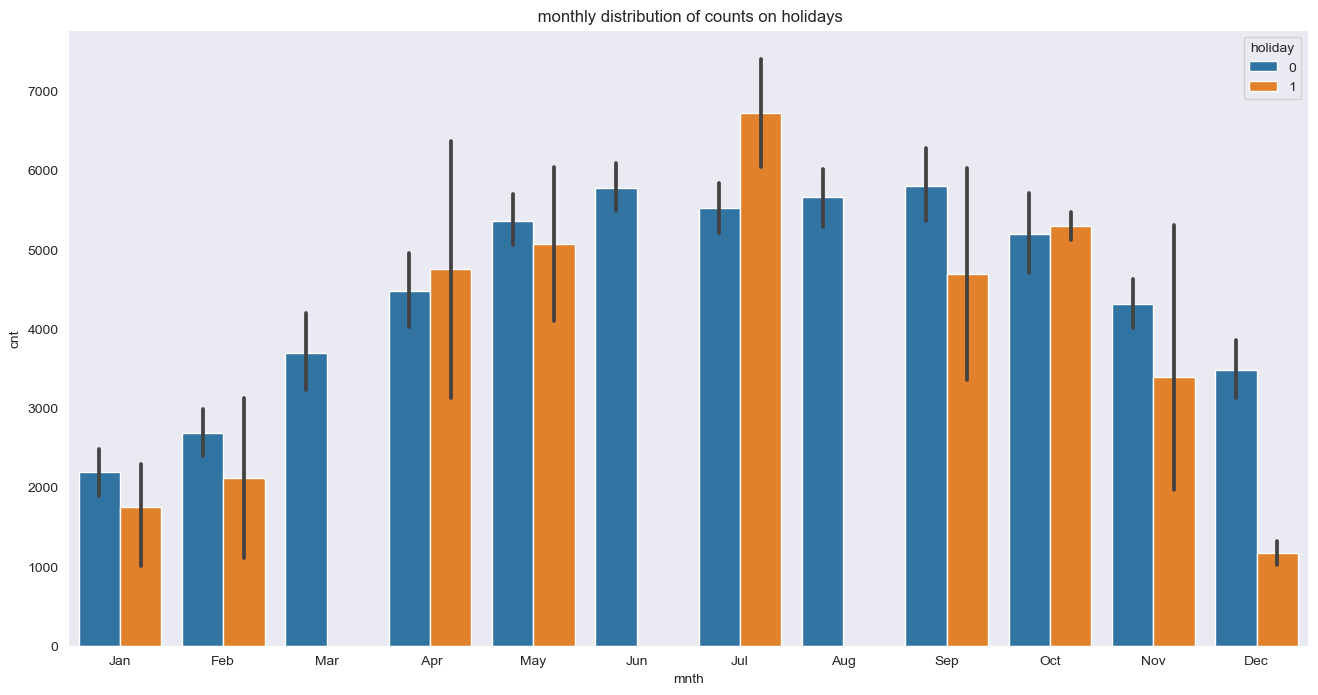

In [45]:
fig,ax = plt.subplots(figsize=(16,8))
sns.set_style('dark') 
sns.barplot(x='mnth',y = 'cnt',data=bike_share[['mnth','cnt','holiday']],ax=ax, hue='holiday')
ax.set_title(' monthly distribution of counts on holidays')
plt.show()

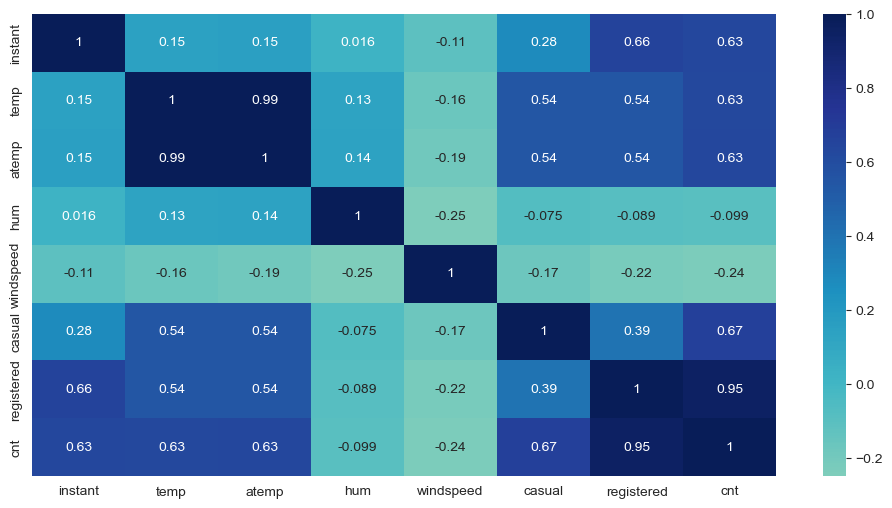

In [46]:
plt.figure(figsize = (12,6) , dpi = 100)
sns.heatmap(bike_share.corr(), cmap="YlGnBu", annot = True,center = 0)
plt.show()

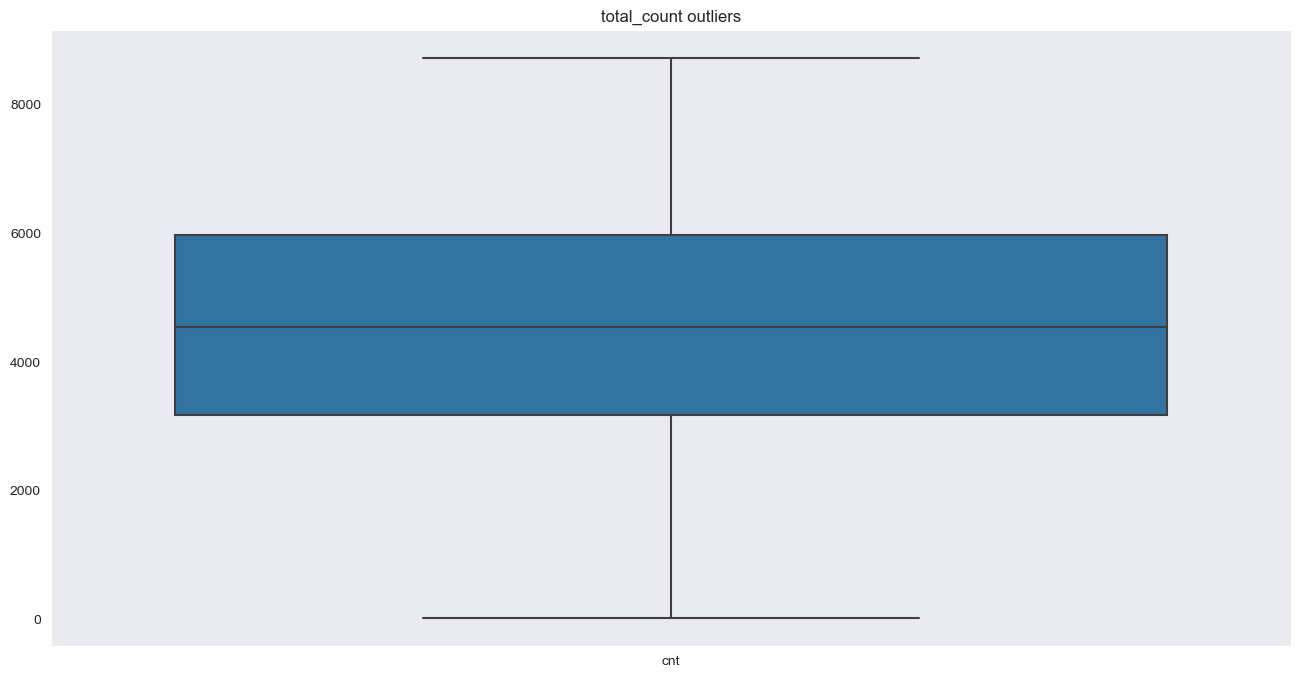

In [47]:
fig,ax=plt.subplots(figsize=(16,8))
ax.set_title('total_count outliers')
sns.boxplot(data=bike_share[['cnt']])

plt.show()

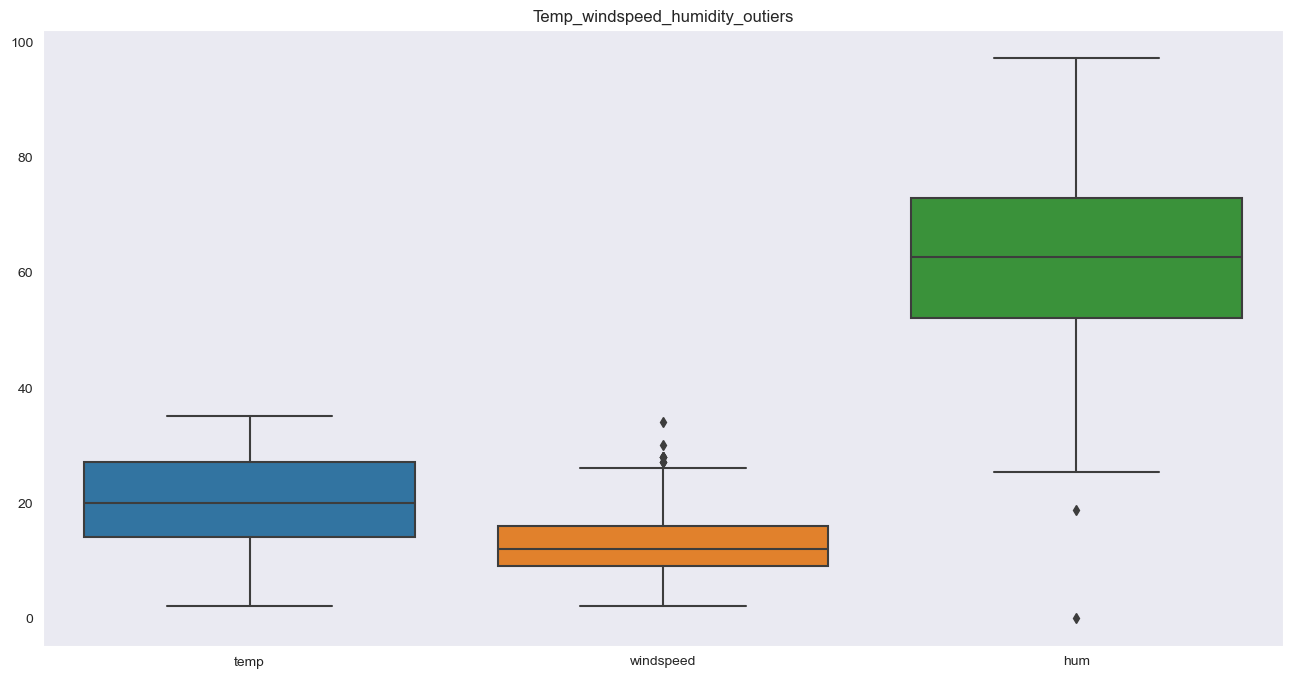

In [48]:
fig,ax=plt.subplots(figsize=(16,8))
ax.set_title('Temp_windspeed_humidity_outiers')
sns.boxplot(data=bike_share[['temp','windspeed','hum']])

plt.show()

In [49]:

wind_humidity=pd.DataFrame(bike_share,columns=['windspeed','hum'])
cnames=['windspeed','hum']       
                      
for i in cnames:
    q75,q25=np.percentile(wind_humidity.loc[:,i],[75,25]) 
    iqr=q75-q25
    max=q75+(iqr*1.5) 
    min=q25-(iqr*1.5) 
    wind_humidity.loc[wind_humidity.loc[:,i]<min,:i]=np.nan  
    wind_humidity.loc[wind_humidity.loc[:,i]>max,:i]=np.nan  

wind_humidity['hum']=wind_humidity['hum'].fillna(wind_humidity['hum'].mean())
wind_humidity['windspeed']=wind_humidity['windspeed'].fillna(wind_humidity['windspeed'].mean())

In [50]:

bike_share['hum']=bike_share['hum'].replace(wind_humidity['hum'])

bike_share['windspeed']=bike_share['windspeed'].replace(wind_humidity['windspeed'])


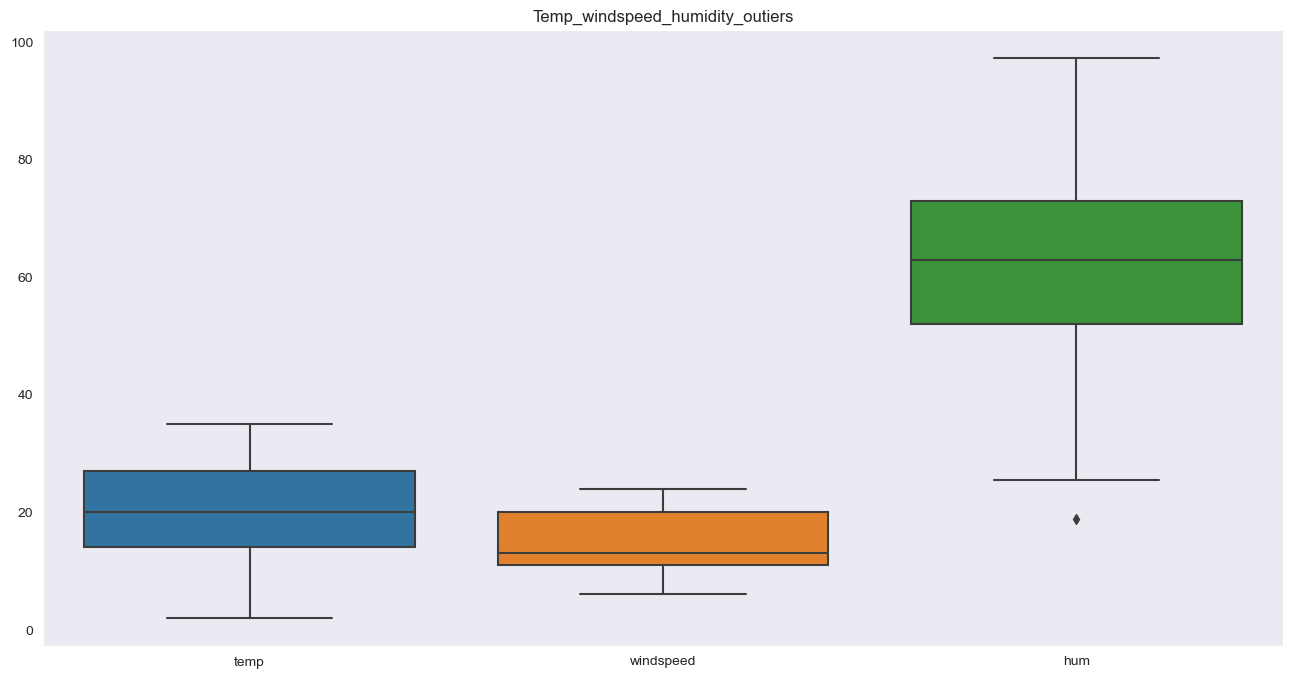

In [51]:
fig,ax=plt.subplots(figsize=(16,8))
ax.set_title('Temp_windspeed_humidity_outiers')
sns.boxplot(data=bike_share[['temp','windspeed','hum']])

plt.show()

In [52]:
bike_share.shape

(730, 16)

In [53]:
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,Jan,0,Sat,0,Cloudy,14.0,18.18125,80.5833,20.0,331,654,985
1,2,2018-02-01,spring,2018,Jan,0,Sun,0,Cloudy,15.0,17.68695,69.6087,10.0,131,670,801
2,3,2018-03-01,spring,2018,Jan,0,Mon,1,Clear,8.0,9.47025,43.7273,10.0,120,1229,1349
3,4,2018-04-01,spring,2018,Jan,0,Tue,1,Clear,8.0,10.60610,59.0435,20.0,108,1454,1562
4,5,2018-05-01,spring,2018,Jan,0,Wed,1,Clear,9.0,11.46350,43.6957,8.0,82,1518,1600


In [54]:
bike_share = bike_share.drop(["dteday"] , axis = 1)
bike_share = bike_share.drop(["instant"] , axis = 1)

In [55]:
data = bike_share.drop(['casual'] , axis = 1)
data = bike_share.drop(['registered'] , axis = 1)

In [56]:

from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

In [57]:
#Split the dataset into the train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(bike_share.iloc[:,0:-3],bike_share.iloc[:,-1],test_size=0.3, random_state=42)

#Reset train index values
X_train.reset_index(inplace=True)
y_train=y_train.reset_index()

# Reset train index values
X_test.reset_index(inplace=True)
y_test=y_test.reset_index()

display(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
display(y_train.head())
display(y_test.head())

(511, 12)

(219, 12)

(511, 2)

(219, 2)

,index,cnt
0,683,5445
1,645,5478
2,163,5020
3,360,1162
4,640,7572


,index,cnt
0,468,7460
1,148,4788
2,302,3331
3,355,3068
4,515,7338


In [58]:
y_train

,index,cnt
0,683,5445
1,645,5478
2,163,5020
3,360,1162
4,640,7572
...,...,...
506,71,2417
507,106,3744
508,270,3907
509,435,5298


In [59]:
#new dataset for train attributes
train_attributes=X_train[['season','mnth','yr','weekday','holiday','workingday','weathersit','hum','temp','windspeed']]
#new dataset for test attributes
test_attributes=X_test[['season','mnth','yr','weekday','holiday','workingday','hum','temp','windspeed','weathersit']]
#categorical attributes
cat_attributes=['season','holiday','workingday','weathersit','yr','mnth','weekday']
#numerical attributes
num_attributes=['temp','windspeed','hum']

In [60]:
train_encoded_attributes=pd.get_dummies(train_attributes,columns=cat_attributes)
print('Shape of transfomed dataframe::',train_encoded_attributes.shape)
train_encoded_attributes.head(5)

Shape of transfomed dataframe:: (511, 35)


,hum,temp,windspeed,season_spring,season_summer,season_fall,season_winter,holiday_0,holiday_1,workingday_0,...,mnth_Oct,mnth_Nov,mnth_Dec,weekday_Sun,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat
0,62.0417,13.0,8.0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,70.9583,16.0,8.0,0,0,0,1,0,1,1,...,1,0,0,0,1,0,0,0,0,0
2,49.4583,26.0,24.0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,76.2500,13.0,8.0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
4,79.3750,27.0,13.0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,1,0,0,0


In [61]:
X_train=train_encoded_attributes
y_train=y_train.cnt.values

In [62]:
lr_model=linear_model.LinearRegression()
lr_model
lr_model.fit(X_train,y_train)
lr_model

LinearRegression()

In [63]:
lr=lr_model.score(X_train,y_train)
print('Accuracy of the model :',lr)
print('Model coefficients :',lr_model.coef_)
print('Model intercept value :',lr_model.intercept_)

Accuracy of the model : 0.8394332663134307
Model coefficients : [-6.93116027e+00  1.10293592e+02 -4.02152525e-01 -1.11537069e+03
  1.92437145e+02  1.03970838e+02  8.18962706e+02  1.92486422e+02
 -1.92486422e+02 -1.05910610e+02  1.05910610e+02  9.33047853e+02
  3.27349875e+02 -1.26039773e+03 -9.86803760e+02  9.86803760e+02
 -7.42171546e+01  6.92529720e+01  4.74033176e+02 -1.20879180e+02
  2.14562723e+02 -1.52378956e+01 -3.41130093e+02 -1.23492688e+02
  5.56549997e+02  2.34017205e+02 -5.14953788e+02 -3.58505273e+02
 -1.58575442e+02 -8.19802031e+01 -1.76039689e+02  1.03347521e+01
  6.24135311e+01  9.86957963e+01  2.45151255e+02]
Model intercept value : 1797.4844034125017


In [64]:
r2_scores = cross_val_score(lr_model, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.8079388190686885


In [65]:
#To get dummy variables to convert categorical variables to numeric
test_encoded_attributes=pd.get_dummies(test_attributes,columns=cat_attributes)
print('Shape of transformed dataframe :',test_encoded_attributes.shape)
test_encoded_attributes.head(5)

Shape of transformed dataframe : (219, 35)


,hum,temp,windspeed,season_spring,season_summer,season_fall,season_winter,holiday_0,holiday_1,workingday_0,...,mnth_Oct,mnth_Nov,mnth_Dec,weekday_Sun,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat
0,50.2917,20.0,8.0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,81.8750,27.0,11.0,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,62.3750,13.0,20.0,0,0,0,1,1,0,1,...,1,0,0,1,0,0,0,0,0,0
3,75.7500,17.0,11.0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,49.2917,28.0,8.0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [66]:
X_test=test_encoded_attributes
y_test=y_test.cnt.values

In [67]:
lr_pred=lr_model.predict(X_test)
display(lr_pred)

array([5974.69583114, 4484.74328753, 3718.15129798, 1370.49711277,
       7228.50112462, 5002.38459471, 2402.14335699, 3070.19896804,
       3547.4910579 , 3438.08517685, 2683.54891619, 4823.18007692,
       2241.71424388, 4483.1410518 , 4794.71750121, 3625.97983526,
       5591.00897944, 1632.07787726, 5999.64362976, 4206.50518056,
       3848.70032716, 4899.49834204, 5004.11897658, 5395.90429863,
       4701.47478645, 4977.37654171, 4080.73621419,  716.24688988,
       4779.93317768, 1653.44566764, 3273.21701131, 3835.04492164,
       1288.85206246, 2145.49600685, 5809.08692082, 4877.83028332,
       2850.56336964, 3130.15262343,  357.47361193, 7469.50234961,
       1840.06823176, 5708.12531746, 5135.74774674, 6773.76013603,
       4516.62032488, 3640.35550233, 6470.53587721, 5301.88132925,
       4697.80227925, 6611.58825732, 4322.58822826, 4340.14747382,
       5361.42486504, 4713.20001983, 5298.2861535 , 7002.83326538,
       4091.84492054, 5724.65456766, 4149.58078294, 4984.41423

In [68]:
#Root mean square error
import math 
rmse=math.sqrt(metrics.mean_squared_error(y_test,lr_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,lr_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 832.1560376684733
Mean absolute error : 613.0969759558786


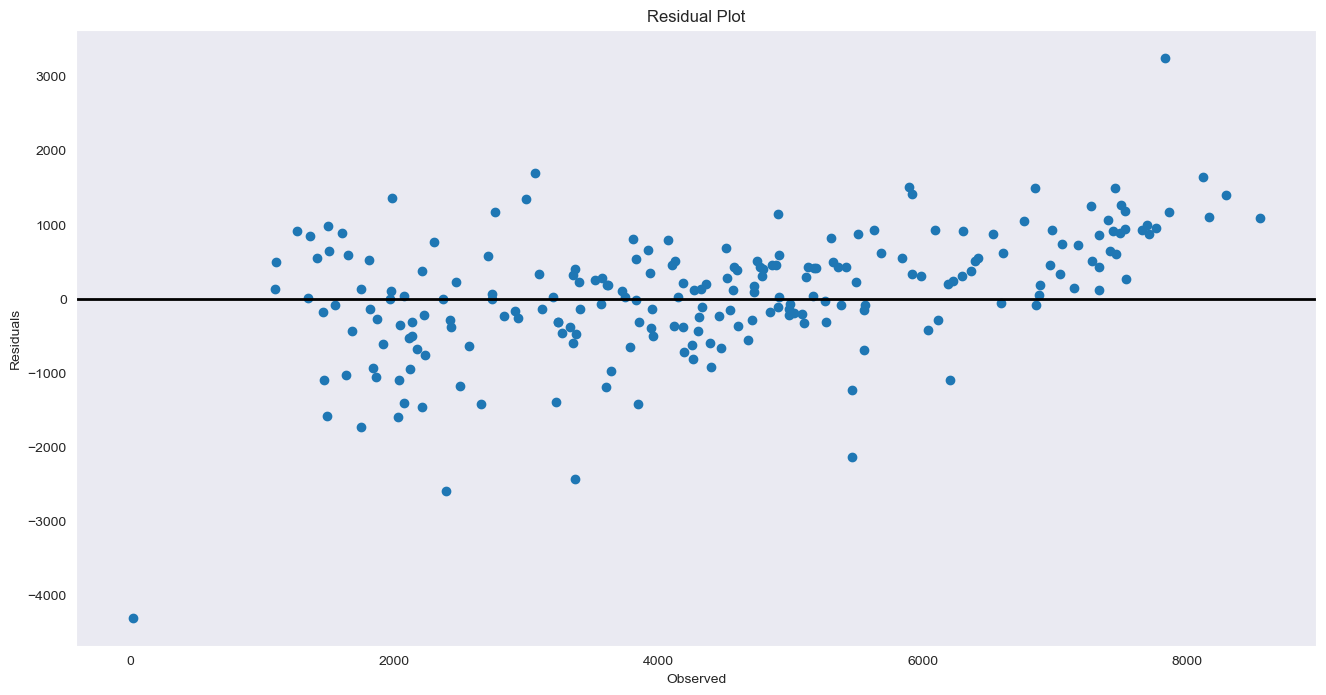

In [69]:
fig, ax = plt.subplots(figsize=(16,8))
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot")
ax.scatter(y_test, y_test-lr_pred)
ax.axhline(lw=2,color='black')

plt.show()